In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as st
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [19]:
def bernoulli_model(mu, lamb, obs):

    with pm.Model() as model:
        tau = pm.Exponential('tau', lamb)
        a = pm.Deterministic('a', 1 + tau * mu)
        b = pm.Deterministic('b', 1 + tau * (1 - mu))
        p = pm.Beta('p', alpha=a, beta=b)
        x = pm.Bernoulli('x', p=p, observed=obs)

    return model

In [27]:
obs = [0, 0, 0, 1, 1, 1, 1]
model = bernoulli_model(mu=0.2, lamb=0.1, obs=obs)

In [28]:
gv = pm.model_to_graphviz(model)
gv.format = 'png'
gv.render(filename='../figures/graphical_model')

'../figures/graphical_model.png'

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, tau]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:02<00:00, 5579.22draws/s]
The acceptance probability does not match the target. It is 0.8994114918674349, but should be close to 0.8. Try to increase the number of tuning steps.


prior	10000
posterior	10000


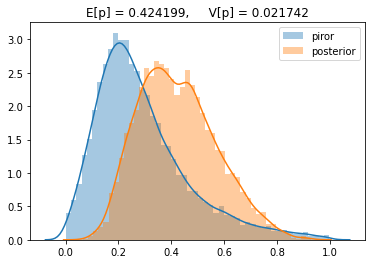

In [29]:
name = 'p'
with model:
    prior = pm.sample_prior_predictive(samples=10000)
    posterior = pm.sample(draws=2500, chains=4)

print(f'prior\t{len(prior[name])}')
print(f'posterior\t{len(posterior[name])}')

sns.distplot(prior[name], label='piror')
sns.distplot(posterior[name], label='posterior')
plt.title(f'E[{name}] = {np.mean(posterior[name]):.6f}, \
    V[{name}] = {np.var(posterior[name]):.6f}')
plt.xlim()
plt.legend()
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, tau]
Sampling 4 chains, 2 divergences: 100%|██████████| 12000/12000 [00:02<00:00, 5795.17draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


prior	10000
posterior	10000


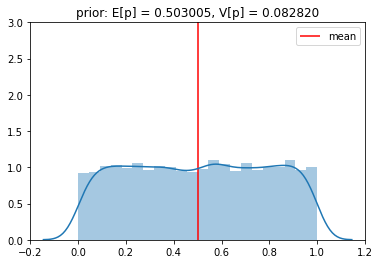

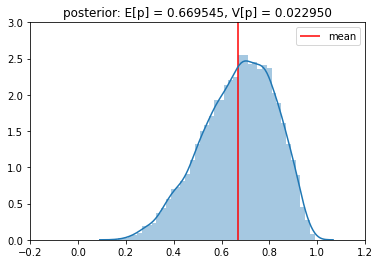

In [23]:
obs = [0] * 2 + [1] * 5
model = bernoulli_model(mu=0.5, lamb=10**8, obs=obs)

name = 'p'
with model:
    prior = pm.sample_prior_predictive(samples=10000)
    posterior = pm.sample(draws=2500, chains=4)

print(f'prior\t{len(prior[name])}')
print(f'posterior\t{len(posterior[name])}')


sns.distplot(prior[name])
plt.vlines([np.mean(prior[name])],\
            ymin=0., ymax=3., colors='r', label='mean')
plt.title(
    'prior: E[{}] = {:.6f}, V[{}] = {:.6f}'\
    .format(name, np.mean(prior[name]), name, np.var(prior[name]))
)
plt.xlim(-0.2, 1.2)
plt.ylim(0., 3.)
plt.legend()
plt.savefig('../figures/prior.png')
plt.show()


sns.distplot(posterior[name])
plt.vlines([np.mean(posterior[name])], \
            ymin=0., ymax=3., colors='r', label='mean')
plt.title(
    'posterior: E[{}] = {:.6f}, V[{}] = {:.6f}'\
    .format(name, np.mean(posterior[name]), name, np.var(posterior[name]))
)
plt.xlim(-0.2, 1.2)
plt.ylim(0., 3.)
plt.legend()
plt.savefig('../figures/posterior.png')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, tau]
Sampling 4 chains, 3 divergences: 100%|██████████| 12000/12000 [00:02<00:00, 4531.07draws/s]
The acceptance probability does not match the target. It is 0.9048824529156854, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, tau]
Sampling 4 chains, 1 divergences: 100%|██████████| 12000/12000 [00:02<00:00, 5174.64draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, tau]
Sampling 4 chains, 3 di

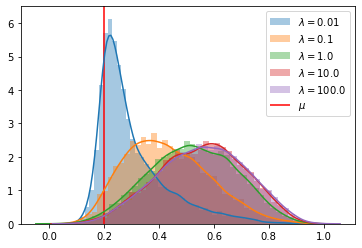

In [40]:
obs = [0, 0, 0, 1, 1, 1, 1]
name='p'
mu = 0.2

plt.vlines(mu, ymin=0., ymax=10., colors='r', label='$\mu$')

for lamb in [0.01, 0.1, 1., 10., 100.]:
    model = bernoulli_model(mu=mu, lamb=lamb, obs=obs)
    with model:
        prior = pm.sample_prior_predictive(samples=10000)
        posterior = pm.sample(draws=2500, chains=4)
    sns.distplot(posterior[name], label=f'$\lambda={lamb}$')

plt.ylim(0, 6.5)
plt.legend()
plt.savefig(f'../figures/compare_posterior.png')
plt.show()